In [3]:
#import the required libraries 
import pandas
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [4]:
#import the dataset which contains various attributes and data about the applicants and chances of admission

df = pandas.read_csv('Admission_Predict.csv', index_col=0)

In [5]:
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
#check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

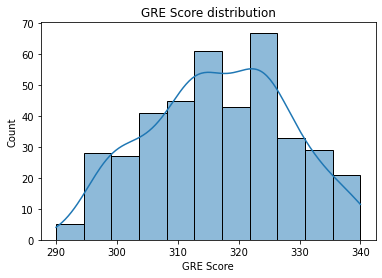

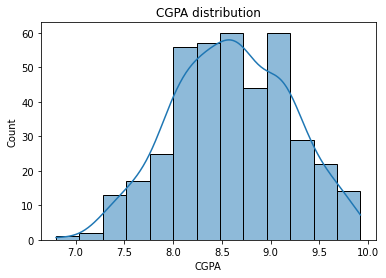

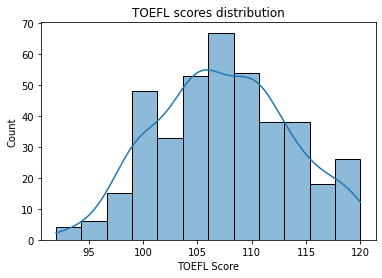

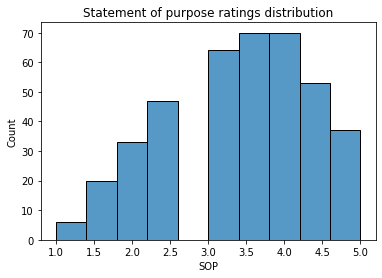

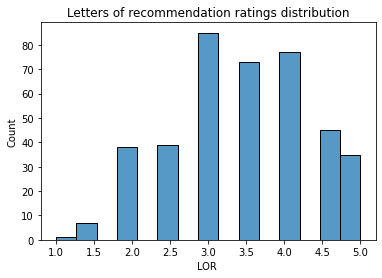

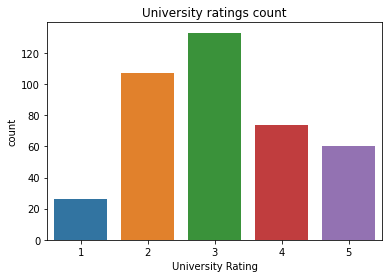

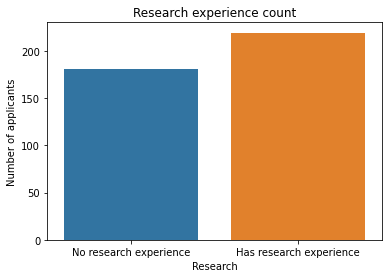

In [8]:
#It seems like there aren't any missing values

#Distribution of various scores and data points

plot = sns.histplot(x=df['GRE Score'], kde = True)
plt.title("GRE Score distribution")
plt.show()

plot = sns.histplot(x=df['CGPA'], kde = True)
plt.title("CGPA distribution")
plt.show()

plot = sns.histplot(x=df['TOEFL Score'], kde= True)
plt.title('TOEFL scores distribution')
plt.show()

plot = sns.histplot(x=df['SOP'])
plt.title('Statement of purpose ratings distribution')
plt.show()

plot = sns.histplot(x=df['LOR '])
plt.title('Letters of recommendation ratings distribution')
plt.show()


#Look at various counts of university ratings and research experience

plot = sns.countplot(x=df['University Rating'])
plt.title('University ratings count')
plt.show()

#fig, ax = plt.subplots(figsize=(7,7))
plot = sns.countplot(x=df['Research'])
plt.ylabel('Number of applicants')

plot.set_xticklabels(['No research experience', 'Has research experience'])
plt.title('Research experience count')
plt.show()

#Create multiple plots in the same figure
#fig, (ax_kde, ax_hist) = plt.subplots(figsize=(6,4), nrows=1, ncols=2)

#sns.histplot(x= df['LOR '], hue=df['Research'], ax=ax_hist)
#sns.kdeplot(x= df['GRE Score'], hue=df['Research'], ax=ax_kde)


#plt.show()




In [9]:
#It seems that applicants come from all kinds of backgrounds with different levels of academic achievement and test scores.
#Furthermore, it seems most applicants come from a tier 3 undergraduate university and a somewhat greater number have research
#experience than those who don't
#There is some restriction of range for test scores and CGPA. This is because all the applicants in this data set scored around
# or above the 50th percentile on the GRE and TOEFL.

df['CGPA'].min()
#We can see that the lowest CGPA was 6.8. Our predictions, when we make them, will be the most accurate for GPAs between
# 6.8 and 10 because we only have data for this range and would have to estimate the admission chances for the GPAs below this range


6.8

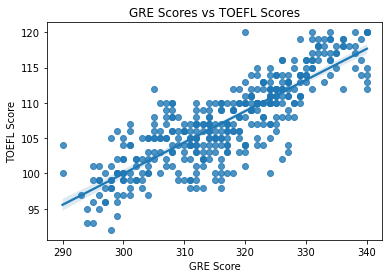

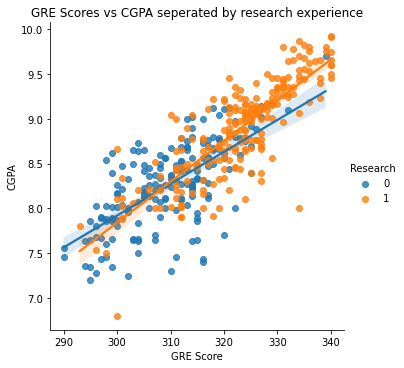

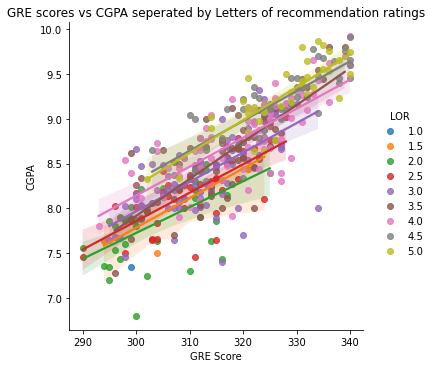

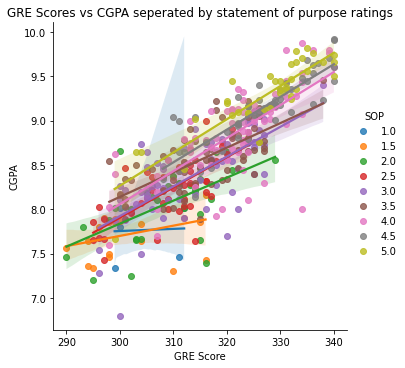

In [10]:
#It is important to see what factors are correlated with each other and responsible for admissions

figure = sns.regplot(x='GRE Score', y='TOEFL Score', data = df)
plt.title('GRE Scores vs TOEFL Scores')
plt.show()


figure = sns.lmplot(x='GRE Score', y='CGPA', data=df, hue='Research')
plt.title('GRE Scores vs CGPA seperated by research experience')
plt.show()


figure = sns.lmplot(x='GRE Score', y='CGPA', data = df, hue='LOR ')
plt.title('GRE scores vs CGPA seperated by Letters of recommendation ratings')
plt.show()


figure = sns.lmplot(x='GRE Score', y='CGPA', data=df, hue='SOP')
plt.title('GRE Scores vs CGPA seperated by statement of purpose ratings')
plt.show()

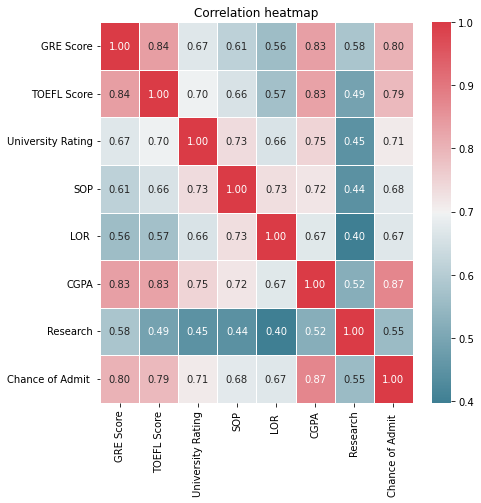

In [11]:
'''
Applicants with higher GRE scores tend to get higher TOEFL scores possibly because both tests test general intelligence to some degree
and both have a verbal component. Applicants with higher GRE scores also tend to have higher GPAs possibly because GRE scores and grades both measure
general intelligence and conscientiousness to some degree. Applicants with higher GRE scores and GPAs are also more likly to have research experience, again,
due to being more motivated, intelligent and hard working. Students with higher GRE scores and grades also tend to have better recommendation letters
and statement of purpose letters though not always. It can be seen from the graph that the different best-fitted lines are not that far apart from each other
and there is a good deal of overlap.
'''

#A heatmap with correlations will help us better understand the magnitude of the relatedness between these different variables
# and to what extent they correlate with chances of admission

corMatrix = df.corr()

#makes fancy colours
colormap = sns.diverging_palette(220, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(7,7))
#make heatmap 
sns.heatmap(corMatrix, cmap=colormap, linewidths=.5, annot=True, fmt=".2f",ax=ax)

plt.title('Correlation heatmap')

plt.show()






In [12]:
#Split the data to train and test a linear regression model

X = df.drop(['Chance of Admit '], axis=1)

y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle = False)



In [13]:
linearModel = LinearRegression()

linearModel.fit(X_train.values,y_train)

prediction = linearModel.predict(X_test.values)

rSquared = r2_score(y_test,prediction)
rsquared = linearModel.score(X_train.values, y_train)

#Calculate sqrt mean squared error to check performance
#RMSE is generally used when we want to give more weight to observations that are further from the mean i.e. outliers
sqrtMSE = np.sqrt(mean_squared_error(prediction,y_test))
MAE = mean_absolute_error(prediction,y_test)



print("RSquared after scoring model using training dataset: {}".format(round(rsquared,2)))
print("RSquared after scoring model using test dataset: {}".format(round(rSquared,2)))
print("Root mean squared error: {}".format(round(sqrtMSE,2)))
print("Mean absolute error: {}".format(round(MAE,2)))

#Linear regression model seems to be decently accurate
# Scores on both the test and the training data are quite close indicating the model is neither underfitting nor overfitting

RSquared after scoring model using training dataset: 0.79
RSquared after scoring model using test dataset: 0.83
Root mean squared error: 0.06
Mean absolute error: 0.04


In [14]:
#Logistic classification model to classify data according to binary outcomes - admitted or rejected
#Assuming that chances above the median will result in the applicant getting accepted

mean_chance = df['Chance of Admit '].mean()
print(mean_chance)



0.72435


In [15]:
#Convert boolean to numerical value

y_train_outcome = (y_train > mean_chance).astype(int)
y_test_outcome = (y_test > mean_chance).astype(int)




#Standardize the data to reduce multicollinearity because our features are strongly correlated with each other
scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [16]:
logModel = LogisticRegression(max_iter = 400)

logModel.fit(X_train.values, y_train_outcome)

y_prediction = logModel.predict(X_test.values)

logModelScore = logModel.score(X_test.values, y_test_outcome)
#accuracyScore = accuracy_score(y_prediction, y_test_outcome)  - This does the same thing as above - calculate testing accuracy

logModelScore1 = logModel.score(X_train.values, y_train_outcome)



#Logistic regression seems to be quite accurate at classifying whether the applicant will be admitted or not.


print("Logistic regression score on testing data set: {}".format(round(logModelScore,2)))
print("Logistic regression score on training data set: {}".format(round(logModelScore1,2)))




Logistic regression score on testing data set: 0.92
Logistic regression score on training data set: 0.85


In [17]:
#Save the models to a pickle file so it can be implemented on the website


linearData = {'model' : linearModel}
logisticData = {'model' : logModel}


#Create pickle file of the Linear Regression Model
#with open('linearModel1.pkl', 'wb') as file:
  #  pickle.dump(linearData,file)


#with open('logisticModel.pkl', 'wb') as file:
   # pickle.dump(logisticData,file)





#checking if the file loads correctly
#with open('linearModel1.pkl', 'rb') as file:
#    loaded = pickle.load(file)


Epoch 1/2000
28/28 [==============================] - 1s 8ms/step - loss: 22.9051 - accuracy: 0.0000e+00 - val_loss: 0.7775 - val_accuracy: 0.0000e+00
Epoch 2/2000
28/28 [==============================] - 0s 6ms/step - loss: 0.1454 - accuracy: 0.0000e+00 - val_loss: 0.0345 - val_accuracy: 0.0000e+00
Epoch 3/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_accuracy: 0.0000e+00
Epoch 4/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0134 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 5/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.0000e+00 - val_loss: 0.0166 - val_accuracy: 0.0000e+00
Epoch 6/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.0000e+00 - val_loss: 0.0106 - val_accuracy: 0.0000e+00
Epoch 7/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.0000

28/28 [==============================] - 0s 4ms/step - loss: 0.0183 - accuracy: 0.0000e+00 - val_loss: 0.0153 - val_accuracy: 0.0000e+00
Epoch 56/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.0000e+00 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 57/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 0.0000e+00 - val_loss: 0.0195 - val_accuracy: 0.0000e+00
Epoch 58/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 0.0000e+00 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 59/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 0.0000e+00 - val_loss: 0.0347 - val_accuracy: 0.0000e+00
Epoch 60/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.0000e+00 - val_loss: 0.0335 - val_accuracy: 0.0000e+00
Epoch 61/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0190 - accuracy: 0.0000e+00 - v

28/28 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.0000e+00 - val_loss: 0.0332 - val_accuracy: 0.0000e+00
Epoch 110/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 0.0000e+00 - val_loss: 0.0303 - val_accuracy: 0.0000e+00
Epoch 111/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.0000e+00 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 112/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0115 - accuracy: 0.0000e+00 - val_loss: 0.0090 - val_accuracy: 0.0000e+00
Epoch 113/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 114/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0102 - accuracy: 0.0000e+00 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 115/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 0.0000e+

Epoch 163/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 164/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0155 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 165/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 166/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 167/2000
28/28 [==============================] - 0s 6ms/step - loss: 0.0161 - accuracy: 0.0000e+00 - val_loss: 0.0513 - val_accuracy: 0.0000e+00
Epoch 168/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.0000e+00 - val_loss: 0.0175 - val_accuracy: 0.0000e+00
Epoch 169/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0166 - acc

Epoch 217/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 218/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 219/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.0000e+00 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 220/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0124 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 221/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0097 - accuracy: 0.0000e+00 - val_loss: 0.0076 - val_accuracy: 0.0000e+00
Epoch 222/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 223/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0103 - acc

Epoch 271/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 272/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 0.0149 - val_accuracy: 0.0000e+00
Epoch 273/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.0000e+00 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 274/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 275/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 276/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 0.0000e+00 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 277/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0086 - acc

Epoch 325/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 0.0000e+00 - val_loss: 0.0073 - val_accuracy: 0.0000e+00
Epoch 326/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 327/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 328/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 329/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 330/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 331/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0067 - acc

Epoch 379/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 380/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.0000e+00 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 381/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 382/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 383/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.0000e+00 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 384/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 385/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0067 - acc

Epoch 433/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0110 - val_accuracy: 0.0000e+00
Epoch 434/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 435/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 436/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.0000e+00 - val_loss: 0.0080 - val_accuracy: 0.0000e+00
Epoch 437/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0102 - val_accuracy: 0.0000e+00
Epoch 438/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 439/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0069 - acc

Epoch 487/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 488/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 489/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 490/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 491/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 492/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0104 - accuracy: 0.0000e+00 - val_loss: 0.0126 - val_accuracy: 0.0000e+00
Epoch 493/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0078 - acc

Epoch 541/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.0000e+00 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 542/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 543/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 544/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.0000e+00 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 545/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.0000e+00 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 546/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0090 - accuracy: 0.0000e+00 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 547/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0080 - acc

Epoch 595/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 596/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 597/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 0.0000e+00 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 598/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 599/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0096 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 600/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 601/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0086 - acc

Epoch 649/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 650/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 651/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 652/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.0000e+00 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 653/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 654/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 655/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0063 - acc

Epoch 703/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 704/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 705/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.0000e+00 - val_loss: 0.0073 - val_accuracy: 0.0000e+00
Epoch 706/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 707/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 708/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 709/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0061 - acc

Epoch 757/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 758/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 759/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 760/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 761/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 762/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0143 - accuracy: 0.0000e+00 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 763/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0082 - acc

Epoch 811/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 812/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 813/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 814/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 815/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 816/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 817/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0061 - acc

Epoch 865/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 866/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 867/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 868/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.0000e+00 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 869/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 870/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.0000e+00 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 871/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0085 - acc

Epoch 919/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 920/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 921/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 922/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 923/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 924/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 925/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0055 - acc

Epoch 973/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 974/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 975/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 976/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 977/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 0.0000e+00 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 978/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 979/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0060 - acc

Epoch 1027/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 1028/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 1029/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 1030/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 1031/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 1032/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 1033/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.006

28/28 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1081/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1082/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 1083/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 1084/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 1085/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 1086/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.

28/28 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 1134/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1135/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 1136/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 1137/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 1138/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 1139/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 1187/2000
28/28 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 1188/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 1189/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 1190/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 1191/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 1192/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 0.

28/28 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.0000e+00 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 1240/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1241/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1242/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 1243/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 1244/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 1245/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0071 - accuracy: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1293/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 1294/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0069 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 1295/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 1296/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 1297/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 1298/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 1346/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1347/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 1348/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 1349/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 1350/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 1351/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.

28/28 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 1399/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1400/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 1401/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1402/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1403/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.0000e+00 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 1404/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 1452/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 1453/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 1454/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 1455/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 1456/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 1457/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 1505/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 1506/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 1507/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1508/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 1509/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 1510/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 1558/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 1559/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 1560/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 1561/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 1562/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 1563/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 0.

28/28 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 1611/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 1612/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 1613/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 1614/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 1615/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 1616/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 1664/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1665/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1666/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 1667/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 1668/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 1669/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 1717/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1718/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 1719/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 1720/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 1721/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1722/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1770/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 1771/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0042 - val_accuracy: 0.0000e+00
Epoch 1772/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 1773/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 1774/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 1775/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 0.

28/28 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 1823/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 1824/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 1825/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 1826/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 1827/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1828/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.

28/28 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 1876/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 1877/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 1878/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 1879/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 1880/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 1881/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.

28/28 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 1929/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 1930/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.0000e+00 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 1931/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 1932/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 1933/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 1934/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.

28/28 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1982/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 1983/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 1984/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 1985/2000
28/28 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 1986/2000
28/28 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 1987/2000
28/28 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 0.

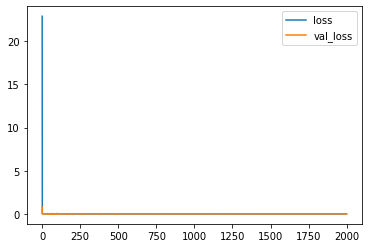

In [19]:

#Regression and prediction using a multilayer perceptron 

Model = keras.Sequential([layers.Dense(units=100, input_shape=[7]),
                         layers.Dense(units=100, activation = 'relu'),
                         layers.Dense(units=100, activation='relu'),
                         layers.Dense(units=100, activation='relu'),
                         layers.Dense(units=100, activation='relu'),
                         layers.Dense(units=1, )])

Model.compile(optimizer = 'adam', loss='mse', metrics=['accuracy'])

early_stopping = callbacks.EarlyStopping(min_delta=0.01, patience =10, restore_best_weights = True)

history = Model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size=10, epochs = 2000)

history_df = pandas.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

evaluate_test = Model.evaluate(X_test, y_test, verbose=0)
evaluate_train = Model.evaluate(X_train, y_train, verbose=0)
print("Train loss: {}, Test loss: {} ".format(round(evaluate_train[0],3), round(evaluate_test[0],3)))